# Mounty Hall Problem

***Implémentation en Python et résolution du fameux jeux de Mounty Hall***

## Enoncé : 

*Le jeu oppose un présentateur à un candidat (le joueur). Ce joueur est placé devant trois portes fermées. Derrière l'une d'elles se trouve une voiture et derrière chacune des deux autres se trouve une chèvre. Il doit tout d'abord désigner une porte. Puis le présentateur doit ouvrir une porte qui n'est ni celle choisie par le candidat, ni celle cachant la voiture (le présentateur sait quelle est la bonne porte dès le début). Le candidat a alors le droit d'ouvrir la porte qu'il a choisie initialement, ou d'ouvrir la troisième porte.*

*Les questions qui se posent au candidat sont :*

***Que doit-il faire ?***

***Quelles sont ses chances de gagner la voiture en agissant au mieux ?***

### Les stratégies : 

***Initialement, le joueur peut choisir entre deux stratégies :***

* Changer de porte
* Ne pas changer de porte

Une stratégie ***alternative*** a été ajoutée et testée :

* Le programme choisi aléatoirement entre changer de porte, et ne pas changer.


In [13]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [2]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    ALTERNATIF = 3

In [3]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte] #J'enleve la mauvaise, donc il ne reste que la bonne porte
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.ALTERNATIF:
        if (premier_choix <= portes[0]) : #Pour éviter l'exception de randint
            deuxieme_choix = randint(premier_choix, portes[0])
        else :
            deuxieme_choix = randint(portes[0], premier_choix)
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [18]:
play_game(Strategie.ALTERNATIF) #Ligne de test

True

In [5]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

## Gain des joueurs, en fonction du nombre de parties jouées :




In [6]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

print("Avec la stratégie alternative, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.ALTERNATIF, 10000))))

En changeant de porte, le joueur a gagné 6640 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3335 sur 10000 parties.
Avec la stratégie alternative, le joueur a gagné 4452 sur 10000 parties.


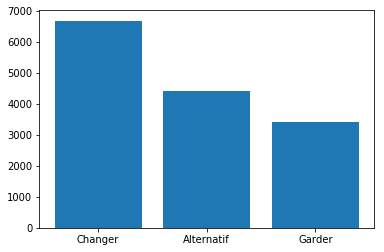

In [7]:
plot = plt.bar([1,2,3],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.ALTERNATIF, 10000)), sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Alternatif","Garder"])

## Suivie de l'évolution du gain des joueurs, en fonction du nombre de parties jouées :

In [9]:
gains_changer = []
gains_garder = []
gains_alternatif = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_alternatif.append(play(Strategie.ALTERNATIF, tours))

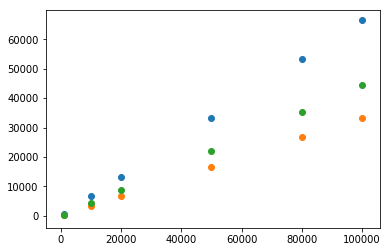

In [10]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
plot = plt.scatter(samples, [sum(x) for x in gains_alternatif])

## Probabilité de gain en moyenne, pour chaque stratégie et par nombre de partie jouées :

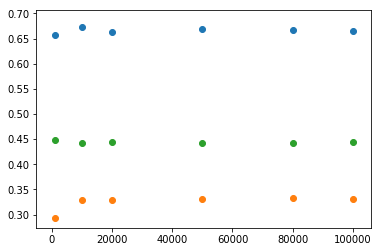

In [12]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x)/y for x,y in zip(gains_changer, samples)])
plot = plt.scatter(samples, [sum(x)/y for x,y in zip(gains_garder, samples)])
plot = plt.scatter(samples, [sum(x)/y for x,y in zip(gains_alternatif, samples)])

# Conclusion 

En dépit de son sens contre intuitif, le joueur a toujours interet à changer de porte lorsque le présentateur le lui demande, en effet en changeant de porte, il passe d'une probabilité de 1/3 à une probabilité de 2/3 de trouver la bonne porte.

La démonstration complète se fait par dénombrement, et est consultable sur Wikipédia :

https://www.wikiwand.com/fr/Problème_de_Monty_Hall